In [1]:
import sys
import os

try:
    sys.path.append(os.path.join(os.path.dirname(__file__), '../'))
except:
    sys.path.append(os.path.join(os.getcwd(), '../'))
    
import re

import pandas as pd
from src import data, models

from scipy.stats import chi2_contingency
from scipy.stats import chi2, ttest_ind

In [2]:
words = {}

In [3]:
df = pd.read_csv('../data/raw/Hate-speech-dataset/hate_speech.tsv', sep='\t',header=None,usecols=[0,1])
df = df.dropna()
df.columns = ['text','category']

df['text_len'] = df.text.apply(lambda x: len(x.split()))
print (df.shape[0], int(df.shape[0]*.8) ,int(df.shape[0]*.1) )
print(df['text_len'].describe())
num_words = len(set(" ".join(df.text.values.tolist()).split()))
words['hate_speech'] = set(" ".join(df.text.values.tolist()).split())
print(num_words)

4578 3662 457
count    4578.000000
mean       19.993884
std        10.382859
min         1.000000
25%        12.000000
50%        19.000000
75%        25.000000
max        67.000000
Name: text_len, dtype: float64
20268


In [4]:
df = pd.read_csv('../data/processed/Aggression_dataset/train.txt', sep='\t',header=None,usecols=[0,1])
df = df.dropna()
df.columns = ['text','category']

df_ = pd.read_csv('../data/processed/Aggression_dataset/val.txt', sep='\t',header=None,usecols=[0,1])
df_ = df_.dropna()
df_.columns = ['text','category']

df = pd.concat([df,df_],axis=0)
df['text_len'] = df.text.apply(lambda x: len(x.split()))
print (df.shape[0], int(df.shape[0]*.8) ,int(df.shape[0]*.1) )
print(df['text_len'].describe())
num_words = len(set(" ".join(df.text.values.tolist()).split()))
words['aggression'] = set(" ".join(df.text.values.tolist()).split())
print(num_words)

30000 24000 3000
count    30000.000000
mean        26.086167
std         39.924125
min          1.000000
25%         11.000000
50%         16.000000
75%         28.000000
max       1126.000000
Name: text_len, dtype: float64
103786


In [5]:
df = pd.read_csv('../data/processed/humor-detection-corpus/data.txt', sep='\t',header=None,usecols=[0,1])
df = df.dropna()
df.columns = ['text','category']

df['text_len'] = df.text.apply(lambda x: len(x.split()))
print (df.shape[0], int(df.shape[0]*.8) ,int(df.shape[0]*.1) )
print(df['text_len'].describe())
num_words = len(set(" ".join(df.text.values.tolist()).split()))
words['humor'] = set(" ".join(df.text.values.tolist()).split())
print(num_words)

2952 2361 295
count    2952.000000
mean       13.314363
std         6.118182
min         2.000000
25%         8.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: text_len, dtype: float64
12152


In [6]:
df = pd.read_csv('../data/processed/SarcasmDetection_CodeMixed/data.txt', sep='\t',header=None,usecols=[0,1])
df = df.dropna()
df.columns = ['text','category']

df['text_len'] = df.text.apply(lambda x: len(x.split()))
print (df.shape[0], int(df.shape[0]*.8) ,int(df.shape[0]*.1) )
print(df['text_len'].describe())
num_words = len(set(" ".join(df.text.values.tolist()).split()))
words['sarcasm'] = set(" ".join(df.text.values.tolist()).split())
print(num_words)

5250 4200 525
count    5250.000000
mean       19.231810
std         6.171285
min         1.000000
25%        15.000000
50%        20.000000
75%        24.000000
max        33.000000
Name: text_len, dtype: float64
23813


In [7]:
df = pd.read_csv('../data/processed/StanceDetection_CodeMixed/data.txt', sep='\t',header=None,usecols=[0,1])
df = df.dropna()
df.columns = ['text','category']

df['text_len'] = df.text.apply(lambda x: len(x.split()))
print (df.shape[0], int(df.shape[0]*.8) ,int(df.shape[0]*.1) )
print(df['text_len'].describe())
num_words = len(set(" ".join(df.text.values.tolist()).split()))
words['stance'] = set(" ".join(df.text.values.tolist()).split())
print(num_words)

3545 2836 354
count    3545.000000
mean       18.539915
std         6.018515
min         2.000000
25%        14.000000
50%        19.000000
75%        23.000000
max        32.000000
Name: text_len, dtype: float64
15390


In [8]:
for key1, val1 in words.items():
    for key2, val2 in words.items():
        if key1 != key2:
            print (key1, key2, len(val1.intersection(val2))*1.0/len(val1))

hate_speech aggression 0.4957568581014407
hate_speech humor 0.1923228734951648
hate_speech sarcasm 0.3406354845075982
hate_speech stance 0.23554371422932702
aggression hate_speech 0.09681459927157805
aggression humor 0.05669358102248858
aggression sarcasm 0.09896325130557108
aggression stance 0.06852562002582237
humor hate_speech 0.3207702435813035
humor aggression 0.48420013166556947
humor sarcasm 0.36043449637919683
humor stance 0.2564186965108624
sarcasm hate_speech 0.2899256708520556
sarcasm aggression 0.4313190274219964
sarcasm humor 0.18393314576071892
sarcasm stance 0.21660437576113886
stance hate_speech 0.3102014294996751
stance aggression 0.4621182586094867
stance humor 0.20246913580246914
stance sarcasm 0.33515269655620533


In [9]:
def calculate_lift(df,col1='category',col2='category_predicted_model2'):
    for val1 in df[col1].unique():
        for val2 in df[col2].unique():
            support = df[(df[col1] == val1) & (df[col2] == val2)].shape[0]/df.shape[0]
            confidence = support*df.shape[0]/df[df[col2] == val2].shape[0]
            lift = confidence*df.shape[0]/df[df[col1] == val1].shape[0]
            
            print ("Lift of {} => {} is {}".format(val1,val2,lift))

In [10]:
hate_test = pd.read_csv('../models/hate_detection/full_test.csv',sep='\t')

In [11]:
hate_test.head()

,text,category,type,category_predicted_model1,category_prob_model1,category_predicted_model2,category_prob_model2
0,doctor sab sahi me ke phd (in hate politics) ...,no,hate,no,1.000000,no,0.999984
1,poore desh me patel obc me aate hain sirf gujr...,no,hate,no,0.999994,no,0.993172
2,hate it jab test ata ho phr bh acha na ho -.-,yes,hate,yes,0.999999,yes,0.998417
3,ek dil ek jaan akal ke imitihaan kal kp ke rap...,no,hate,no,0.999999,no,0.915283
4,aise logo se sakht nafrat karta hu jo caste ko...,yes,hate,yes,1.000000,yes,0.999865


In [12]:
_, p, _, _ = chi2_contingency(pd.crosstab(hate_test[hate_test['type'] == 'aggression']['category'],\
            hate_test[hate_test['type'] == 'aggression']['category_predicted_model2']).values)

print (p)

3.252024298636947e-07


In [13]:
hate_test[hate_test['type'] == 'aggression'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)

category  category_predicted_model2
CAG       no                           0.884984
          yes                          0.115016
NAG       no                           0.946333
          yes                          0.053667
OAG       no                           0.857023
          yes                          0.142977
Name: category_predicted_model2, dtype: float64

In [14]:
calculate_lift(hate_test[hate_test['type'] == 'aggression'])

Lift of OAG => yes is 1.2468949869931738
Lift of OAG => no is 0.9680226372267876
Lift of CAG => yes is 1.0030462887287317
Lift of CAG => no is 0.9996054505562185
Lift of NAG => yes is 0.4680284561301328
Lift of NAG => no is 1.0688999288747116


In [15]:
_, p, _, _ = chi2_contingency(pd.crosstab(hate_test[hate_test['type'] == 'humor']['category'],\
            hate_test[hate_test['type'] == 'humor']['category_predicted_model2']).values)

print (p)

0.9380758044926549


In [16]:
hate_test[hate_test['type'] == 'humor'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)

category  category_predicted_model2
H         no                           0.926136
          yes                          0.073864
N         no                           0.916667
          yes                          0.083333
Name: category_predicted_model2, dtype: float64

In [17]:
calculate_lift(hate_test[hate_test['type'] == 'humor'])

Lift of H => no is 1.0041625041625042
Lift of H => yes is 0.950592885375494
Lift of N => no is 0.9938949938949939
Lift of N => yes is 1.072463768115942


In [18]:
_, p, _, _ = chi2_contingency(pd.crosstab(hate_test[hate_test['type'] == 'sarcasm']['category'],\
            hate_test[hate_test['type'] == 'sarcasm']['category_predicted_model2']).values)

print (p)

0.6874626944218479


In [19]:
hate_test[hate_test['type'] == 'sarcasm'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)

category  category_predicted_model2
NO        no                           0.888412
          yes                          0.111588
YES       no                           0.915254
          yes                          0.084746
Name: category_predicted_model2, dtype: float64

In [20]:
calculate_lift(hate_test[hate_test['type'] == 'sarcasm'])

Lift of NO => no is 0.9966160448993067
Lift of NO => yes is 1.0277840524056923
Lift of YES => no is 1.0267275097783573
Lift of YES => yes is 0.7805530776092775


In [21]:
_, p, _, _ = chi2_contingency(pd.crosstab(hate_test[hate_test['type'] == 'stance']['category'],\
            hate_test[hate_test['type'] == 'stance']['category_predicted_model2']).values)

print (p)

0.6602731269338526


In [22]:
hate_test[hate_test['type'] == 'stance'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)

category  category_predicted_model2
AGAINST   no                           0.882353
          yes                          0.117647
FAVOR     no                           0.877193
          yes                          0.122807
NONE      no                           0.908213
          yes                          0.091787
Name: category_predicted_model2, dtype: float64

In [23]:
calculate_lift(hate_test[hate_test['type'] == 'stance'])

Lift of NONE => no is 1.0138850909974781
Lift of NONE => yes is 0.8806632719676197
Lift of FAVOR => no is 0.9792563168928611
Lift of FAVOR => yes is 1.1782835467045993
Lift of AGAINST => no is 0.9850166481687016
Lift of AGAINST => yes is 1.1287758346581875


In [24]:
aggression_test = pd.read_csv('../models/model_aggression/full_test.csv',sep='\t')

In [25]:
_, p, _, _ = chi2_contingency(pd.crosstab(aggression_test[aggression_test['type'] == 'hate']['category'],\
            aggression_test[aggression_test['type'] == 'hate']['category_predicted_model2']).values)

print (p)

0.6126646037670338


In [26]:
aggression_test[aggression_test['type'] == 'hate'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)

category  category_predicted_model2
no        CAG                          0.459119
          OAG                          0.430818
          NAG                          0.110063
yes       OAG                          0.471429
          CAG                          0.442857
          NAG                          0.085714
Name: category_predicted_model2, dtype: float64

In [27]:
calculate_lift(aggression_test[aggression_test['type'] == 'hate'])

Lift of no => OAG is 0.9719924404374631
Lift of no => CAG is 1.0109458151910982
Lift of no => NAG is 1.072527766626522
Lift of yes => OAG is 1.0636171710063336
Lift of yes => CAG is 0.9751373626373628
Lift of yes => NAG is 0.8352583586626139


In [28]:
_, p, _, _ = chi2_contingency(pd.crosstab(aggression_test[aggression_test['type'] == 'humor']['category'],\
            aggression_test[aggression_test['type'] == 'humor']['category_predicted_model2']).values)

print (p)

0.2087935901118099


In [29]:
aggression_test[aggression_test['type'] == 'humor'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)

category  category_predicted_model2
H         CAG                          0.392045
          OAG                          0.386364
          NAG                          0.221591
N         CAG                          0.425000
          OAG                          0.291667
          NAG                          0.283333
Name: category_predicted_model2, dtype: float64

In [30]:
calculate_lift(aggression_test[aggression_test['type'] == 'humor'])

Lift of H => OAG is 1.1103265666372464
Lift of H => NAG is 0.8985056039850559
Lift of H => CAG is 0.9670454545454544
Lift of N => OAG is 0.8381877022653722
Lift of N => NAG is 1.1488584474885846
Lift of N => CAG is 1.0483333333333333


In [31]:
_, p, _, _ = chi2_contingency(pd.crosstab(aggression_test[aggression_test['type'] == 'sarcasm']['category'],\
            aggression_test[aggression_test['type'] == 'sarcasm']['category_predicted_model2']).values)

print (p)

0.07273999330705425


In [32]:
aggression_test[aggression_test['type'] == 'sarcasm'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)

category  category_predicted_model2
NO        CAG                          0.532189
          OAG                          0.336910
          NAG                          0.130901
YES       CAG                          0.559322
          NAG                          0.220339
          OAG                          0.220339
Name: category_predicted_model2, dtype: float64

In [33]:
calculate_lift(aggression_test[aggression_test['type'] == 'sarcasm'])

Lift of NO => CAG is 0.9943029951277627
Lift of NO => OAG is 1.0404569553143146
Lift of NO => NAG is 0.9286915671035842
Lift of YES => CAG is 1.0449966825502142
Lift of YES => OAG is 0.6804586241276172
Lift of YES => NAG is 1.5632157581310127


In [34]:
_, p, _, _ = chi2_contingency(pd.crosstab(aggression_test[aggression_test['type'] == 'stance']['category'],\
            aggression_test[aggression_test['type'] == 'stance']['category_predicted_model2']).values)

print (p)

0.6717344758535984


In [35]:
aggression_test[aggression_test['type'] == 'stance'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)

category  category_predicted_model2
AGAINST   CAG                          0.705882
          OAG                          0.235294
          NAG                          0.058824
FAVOR     CAG                          0.631579
          OAG                          0.280702
          NAG                          0.087719
NONE      CAG                          0.589372
          OAG                          0.294686
          NAG                          0.115942
Name: category_predicted_model2, dtype: float64

In [36]:
calculate_lift(aggression_test[aggression_test['type'] == 'stance'])

Lift of NONE => OAG is 1.0357774907925574
Lift of NONE => CAG is 0.959757124495856
Lift of NONE => NAG is 1.1433172302737518
Lift of FAVOR => OAG is 0.9866249782873024
Lift of FAVOR => CAG is 1.0284886528247223
Lift of FAVOR => NAG is 0.865009746588694
Lift of AGAINST => OAG is 0.8270238788584741
Lift of AGAINST => CAG is 1.1494873178629248
Lift of AGAINST => NAG is 0.5800653594771241


In [37]:
humor_test = pd.read_csv('../models/humor_detection/full_test.csv',sep='\t')

In [38]:
_, p, _, _ = chi2_contingency(pd.crosstab(humor_test[humor_test['type'] == 'hate']['category'],\
            humor_test[humor_test['type'] == 'hate']['category_predicted_model2']).values)

print (p)

0.9977765902751704


In [39]:
humor_test[humor_test['type'] == 'hate'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)

category  category_predicted_model2
no        H                            0.805031
          N                            0.194969
yes       H                            0.800000
          N                            0.200000
Name: category_predicted_model2, dtype: float64

In [40]:
calculate_lift(humor_test[humor_test['type'] == 'hate'])

Lift of no => N is 0.9921733053808528
Lift of no => H is 1.001914137270987
Lift of yes => N is 1.0177777777777777
Lift of yes => H is 0.9956521739130435


In [41]:
_, p, _, _ = chi2_contingency(pd.crosstab(humor_test[humor_test['type'] == 'sarcasm']['category'],\
            humor_test[humor_test['type'] == 'sarcasm']['category_predicted_model2']).values)

print (p)

0.6536227360236224


In [42]:
humor_test[humor_test['type'] == 'sarcasm'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)

category  category_predicted_model2
NO        H                            0.781116
          N                            0.218884
YES       H                            0.745763
          N                            0.254237
Name: category_predicted_model2, dtype: float64

In [43]:
calculate_lift(humor_test[humor_test['type'] == 'sarcasm'])

Lift of NO => N is 0.9821723341036646
Lift of NO => H is 1.0051123453673316
Lift of YES => N is 1.1408083441981747
Lift of YES => H is 0.9596211365902293


In [44]:
_, p, _, _ = chi2_contingency(pd.crosstab(humor_test[humor_test['type'] == 'aggression']['category'],\
            humor_test[humor_test['type'] == 'aggression']['category_predicted_model2']).values)

print (p)

9.44501359285401e-16


In [45]:
humor_test[humor_test['type'] == 'aggression'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)

category  category_predicted_model2
CAG       H                            0.542332
          N                            0.457668
NAG       N                            0.633274
          H                            0.366726
OAG       H                            0.574432
          N                            0.425568
Name: category_predicted_model2, dtype: float64

In [46]:
calculate_lift(humor_test[humor_test['type'] == 'aggression'])

Lift of OAG => H is 1.0997427492924667
Lift of OAG => N is 0.890930294388489
Lift of CAG => H is 1.038287686733772
Lift of CAG => N is 0.9581320271375987
Lift of NAG => H is 0.7020924638650704
Lift of NAG => N is 1.3257649051803453


In [47]:
_, p, _, _ = chi2_contingency(pd.crosstab(humor_test[humor_test['type'] == 'stance']['category'],\
            humor_test[humor_test['type'] == 'stance']['category_predicted_model2']).values)

print (p)

0.6332394645005726


In [48]:
humor_test[humor_test['type'] == 'stance'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)

category  category_predicted_model2
AGAINST   H                            0.911765
          N                            0.088235
FAVOR     H                            0.859649
          N                            0.140351
NONE      H                            0.850242
          N                            0.149758
Name: category_predicted_model2, dtype: float64

In [49]:
calculate_lift(humor_test[humor_test['type'] == 'stance'])

Lift of NONE => H is 0.9896254058762969
Lift of NONE => N is 1.0632850241545893
Lift of FAVOR => H is 1.0005752085130861
Lift of FAVOR => N is 0.9964912280701755
Lift of AGAINST => H is 1.0612343297974927
Lift of AGAINST => N is 0.626470588235294


In [50]:
sarcasm_test = pd.read_csv('../models/sarcasm_detection/full_test.csv',sep='\t')

In [51]:
_, p, _, _ = chi2_contingency(pd.crosstab(sarcasm_test[sarcasm_test['type'] == 'hate']['category'],\
            sarcasm_test[sarcasm_test['type'] == 'hate']['category_predicted_model2']).values)

print (p)

0.08465996464967636


In [52]:
sarcasm_test[sarcasm_test['type'] == 'hate'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)

category  category_predicted_model2
no        NO                           0.528302
          YES                          0.471698
yes       YES                          0.564286
          NO                           0.435714
Name: category_predicted_model2, dtype: float64

In [53]:
calculate_lift(sarcasm_test[sarcasm_test['type'] == 'hate'])

Lift of no => NO is 1.0566037735849056
Lift of no => YES is 0.9433962264150944
Lift of yes => NO is 0.8714285714285714
Lift of yes => YES is 1.1285714285714286


In [54]:
_, p, _, _ = chi2_contingency(pd.crosstab(sarcasm_test[sarcasm_test['type'] == 'humor']['category'],\
            sarcasm_test[sarcasm_test['type'] == 'humor']['category_predicted_model2']).values)

print (p)

0.1806861896596051


In [55]:
sarcasm_test[sarcasm_test['type'] == 'humor'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)

category  category_predicted_model2
H         NO                           0.505682
          YES                          0.494318
N         NO                           0.591667
          YES                          0.408333
Name: category_predicted_model2, dtype: float64

In [56]:
calculate_lift(sarcasm_test[sarcasm_test['type'] == 'humor'])

Lift of H => NO is 0.9355113636363637
Lift of H => YES is 1.0758689839572193
Lift of N => NO is 1.0945833333333332
Lift of N => YES is 0.8887254901960784


In [57]:
_, p, _, _ = chi2_contingency(pd.crosstab(sarcasm_test[sarcasm_test['type'] == 'aggression']['category'],\
            sarcasm_test[sarcasm_test['type'] == 'aggression']['category_predicted_model2']).values)

print (p)

3.540313521137108e-08


In [58]:
sarcasm_test[sarcasm_test['type'] == 'aggression'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)

category  category_predicted_model2
CAG       NO                           0.547125
          YES                          0.452875
NAG       NO                           0.681574
          YES                          0.318426
OAG       NO                           0.544155
          YES                          0.455845
Name: category_predicted_model2, dtype: float64

In [59]:
calculate_lift(sarcasm_test[sarcasm_test['type'] == 'aggression'])

Lift of OAG => YES is 1.062576335915276
Lift of OAG => NO is 0.9529855549778398
Lift of CAG => YES is 1.0556536115641548
Lift of CAG => NO is 0.9581866911365633
Lift of NAG => YES is 0.7422511894783809
Lift of NAG => NO is 1.1936501571169431


In [60]:
_, p, _, _ = chi2_contingency(pd.crosstab(sarcasm_test[sarcasm_test['type'] == 'stance']['category'],\
            sarcasm_test[sarcasm_test['type'] == 'stance']['category_predicted_model2']).values)

print (p)

0.024521396586768628


In [61]:
sarcasm_test[sarcasm_test['type'] == 'stance'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)

category  category_predicted_model2
AGAINST   NO                           0.676471
          YES                          0.323529
FAVOR     YES                          0.587719
          NO                           0.412281
NONE      YES                          0.541063
          NO                           0.458937
Name: category_predicted_model2, dtype: float64

In [62]:
calculate_lift(sarcasm_test[sarcasm_test['type'] == 'stance'])

Lift of NONE => NO is 0.9874103352364221
Lift of NONE => YES is 1.010933129926265
Lift of FAVOR => NO is 0.8870281765018607
Lift of FAVOR => YES is 1.098107109879963
Lift of AGAINST => NO is 1.4554367201426026
Lift of AGAINST => YES is 0.6044891640866874


In [63]:
stance_test = pd.read_csv('../models/stance_detection/full_test.csv',sep='\t')

In [64]:
_, p, _, _ = chi2_contingency(pd.crosstab(stance_test[stance_test['type'] == 'hate']['category'],\
            stance_test[stance_test['type'] == 'hate']['category_predicted_model2']).values)

print (p)

0.5165819613346466


In [65]:
stance_test[stance_test['type'] == 'hate'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)


category  category_predicted_model2
no        NONE                         0.823899
          FAVOR                        0.116352
          AGAINST                      0.059748
yes       NONE                         0.778571
          FAVOR                        0.142857
          AGAINST                      0.078571
Name: category_predicted_model2, dtype: float64

In [66]:
calculate_lift(stance_test[stance_test['type'] == 'hate'])

Lift of no => FAVOR is 0.934900143440362
Lift of no => NONE is 1.0171048839614165
Lift of no => AGAINST is 0.9121593291404612
Lift of yes => FAVOR is 1.1478696741854637
Lift of yes => NONE is 0.9611474778590682
Lift of yes => AGAINST is 1.1995238095238094


In [67]:
_, p, _, _ = chi2_contingency(pd.crosstab(stance_test[stance_test['type'] == 'humor']['category'],\
            stance_test[stance_test['type'] == 'humor']['category_predicted_model2']).values)

print (p)

0.7522253767814564


In [68]:
stance_test[stance_test['type'] == 'humor'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)


category  category_predicted_model2
H         NONE                         0.829545
          FAVOR                        0.090909
          AGAINST                      0.079545
N         NONE                         0.858333
          FAVOR                        0.083333
          AGAINST                      0.058333
Name: category_predicted_model2, dtype: float64

In [69]:
calculate_lift(stance_test[stance_test['type'] == 'humor'])

Lift of H => FAVOR is 1.034965034965035
Lift of H => NONE is 0.986126323475721
Lift of H => AGAINST is 1.121212121212121
Lift of N => FAVOR is 0.9487179487179488
Lift of N => NONE is 1.0203480589022758
Lift of N => AGAINST is 0.8222222222222222


In [70]:
_, p, _, _ = chi2_contingency(pd.crosstab(stance_test[stance_test['type'] == 'sarcasm']['category'],\
            stance_test[stance_test['type'] == 'sarcasm']['category_predicted_model2']).values)

print (p)

0.4353193762156161


In [71]:
stance_test[stance_test['type'] == 'sarcasm'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)


category  category_predicted_model2
NO        NONE                         0.802575
          FAVOR                        0.124464
          AGAINST                      0.072961
YES       NONE                         0.745763
          FAVOR                        0.135593
          AGAINST                      0.118644
Name: category_predicted_model2, dtype: float64

In [72]:
calculate_lift(stance_test[stance_test['type'] == 'sarcasm'])

Lift of NO => NONE is 1.0080189744748136
Lift of NO => FAVOR is 0.9900507218103785
Lift of NO => AGAINST is 0.934261488537632
Lift of YES => NONE is 0.936663693131133
Lift of YES => FAVOR is 1.078582434514638
Lift of YES => AGAINST is 1.5192228193468376


In [73]:
_, p, _, _ = chi2_contingency(pd.crosstab(stance_test[stance_test['type'] == 'aggression']['category'],\
            stance_test[stance_test['type'] == 'aggression']['category_predicted_model2']).values)

print (p)

0.118836552107402


In [74]:
stance_test[stance_test['type'] == 'aggression'].groupby(['category'])['category_predicted_model2'].value_counts(normalize=True)


category  category_predicted_model2
CAG       NONE                         0.821885
          FAVOR                        0.126198
          AGAINST                      0.051917
NAG       NONE                         0.822898
          FAVOR                        0.137746
          AGAINST                      0.039356
OAG       NONE                         0.787216
          FAVOR                        0.152229
          AGAINST                      0.060555
Name: category_predicted_model2, dtype: float64

In [75]:
calculate_lift(stance_test[stance_test['type'] == 'aggression'])

Lift of OAG => NONE is 0.9738756470394423
Lift of OAG => FAVOR is 1.0978035841366371
Lift of OAG => AGAINST is 1.1425488360283733
Lift of CAG => NONE is 1.0167649286914133
Lift of CAG => FAVOR is 0.9100823298107643
Lift of CAG => AGAINST is 0.9795647718367594
Lift of NAG => NONE is 1.0180181841653908
Lift of NAG => FAVOR is 0.9933603963120958
Lift of NAG => AGAINST is 0.7425659027238667


### Top words

In [11]:
words_hate = pd.read_csv('../models/hate_detection/word_weights.csv',sep='\t')
words_aggression = pd.read_csv('../models/model_aggression/word_weights.csv',sep='\t')
words_humor = pd.read_csv('../models/humor_detection/word_weights.csv',sep='\t')
words_sarcasm = pd.read_csv('../models/sarcasm_detection/word_weights.csv',sep='\t')
words_stance = pd.read_csv('../models/stance_detection/word_weights.csv',sep='\t')

In [12]:
words_hate = words_hate.dropna()
words_hate.word = words_hate.word.apply(lambda x: re.sub('[^a-zA-Z0-9]',' ',x).strip())
words_hate = words_hate[words_hate.word != '']
#words_hate.groupby(['word'])['hate_yes'].var().fillna(0).sort_values(ascending=[False])
#print (words_hate.groupby(['word'])['Hate_yes'].var().fillna(0).describe())
#words_hate = words_hate.groupby(['word'])['Hate_yes'].mean().reset_index(drop=False)

In [13]:
words_sarcasm = words_sarcasm.dropna()
words_sarcasm.word = words_sarcasm.word.apply(lambda x: re.sub('[^a-zA-Z0-9]',' ',x).strip())
words_sarcasm = words_sarcasm[words_sarcasm.word != '']
#words_sarcasm.groupby(['word'])['Sarcasm_yes'].var().fillna(0).sort_values(ascending=[False])
#print (words_sarcasm.groupby(['word'])['Sarcasm_yes'].var().fillna(0).describe())
#words_sarcasm = words_sarcasm.groupby(['word'])['Sarcasm_yes'].mean().reset_index(drop=False)

In [14]:
words_humor = words_humor.dropna()
words_humor.word = words_humor.word.apply(lambda x: re.sub('[^a-zA-Z0-9]',' ',x).strip())
words_humor = words_humor[words_humor.word != '']
#words_sarcasm.groupby(['word'])['Sarcasm_yes'].var().fillna(0).sort_values(ascending=[False])
#print (words_humor.groupby(['word'])['Humor_yes'].var().fillna(0).describe())
#words_humor = words_humor.groupby(['word'])['Humor_yes'].mean().reset_index(drop=False)

In [15]:
words_aggression = words_aggression.dropna()
words_aggression.word = words_aggression.word.apply(lambda x: re.sub('[^a-zA-Z0-9]',' ',x).strip())
words_aggression = words_aggression[words_aggression.word != '']
#words_sarcasm.groupby(['word'])['Sarcasm_yes'].var().fillna(0).sort_values(ascending=[False])
#print (words_aggression.groupby(['word'])['OAG'].var().fillna(0).describe())
#print (words_aggression.groupby(['word'])['CAG'].var().fillna(0).describe())
#words_aggression = words_aggression.groupby(['word'])['OAG','CAG'].mean().reset_index(drop=False)

In [16]:
words_stance = words_stance.dropna()
words_stance.word = words_stance.word.apply(lambda x: re.sub('[^a-zA-Z0-9]',' ',x).strip())
words_stance = words_stance[words_stance.word != '']
#words_sarcasm.groupby(['word'])['Sarcasm_yes'].var().fillna(0).sort_values(ascending=[False])
#print (words_stance.groupby(['word'])['Stance_against'].var().fillna(0).describe())
#print (words_stance.groupby(['word'])['Stance_favor'].var().fillna(0).describe())
#words_stance = words_stance.groupby(['word'])['Stance_against','Stance_favor'].mean().reset_index(drop=False)

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [53]:
var_tables = pd.DataFrame()

temp = pd.DataFrame(words_hate.groupby(['word'])['Hate_yes'].var().dropna().reset_index(drop=True))
temp.columns = ['var']
temp['Label'] = "Hate"

var_tables = pd.concat([var_tables, temp], axis=0)

temp = pd.DataFrame(words_sarcasm.groupby(['word'])['Sarcasm_yes'].var().dropna().reset_index(drop=True))
temp.columns = ['var']
temp['Label'] = "Sarcasm"

var_tables = pd.concat([var_tables, temp], axis=0)

temp = pd.DataFrame(words_humor.groupby(['word'])['Humor_yes'].var().dropna().reset_index(drop=True))
temp.columns = ['var']
temp['Label'] = "Humor"

var_tables = pd.concat([var_tables, temp], axis=0)

temp = pd.DataFrame(words_aggression.groupby(['word'])['OAG'].var().dropna().reset_index(drop=True))
temp.columns = ['var']
temp['Label'] = "Aggression OAG"

var_tables = pd.concat([var_tables, temp], axis=0)

temp = pd.DataFrame(words_aggression.groupby(['word'])['CAG'].var().dropna().reset_index(drop=True))
temp.columns = ['var']
temp['Label'] = "Aggression CAG"

var_tables = pd.concat([var_tables, temp], axis=0)

temp = pd.DataFrame(words_stance.groupby(['word'])['Stance_against'].var().dropna().reset_index(drop=True))
temp.columns = ['var']
temp['Label'] = "Stance Against"

var_tables = pd.concat([var_tables, temp], axis=0)

temp = pd.DataFrame(words_stance.groupby(['word'])['Stance_favor'].var().dropna().reset_index(drop=True))
temp.columns = ['var']
temp['Label'] = "Stance Favor"

var_tables = pd.concat([var_tables, temp], axis=0)

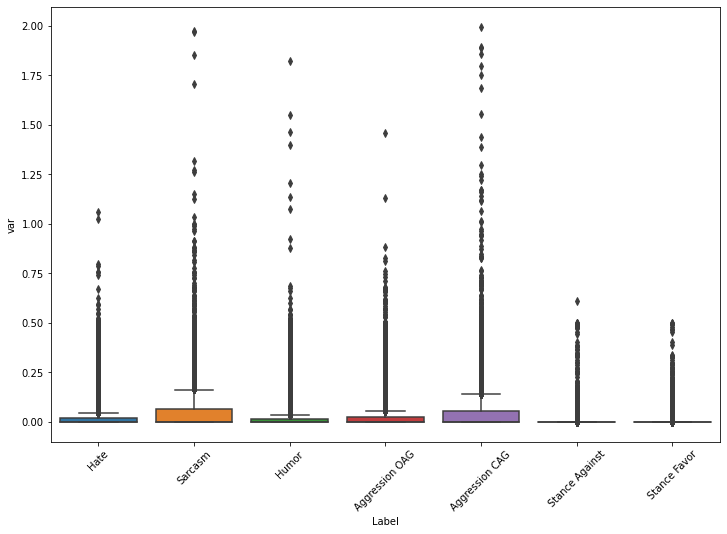

In [54]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Label",y='var',data=var_tables)
plt.xticks(rotation=45)
plt.show()

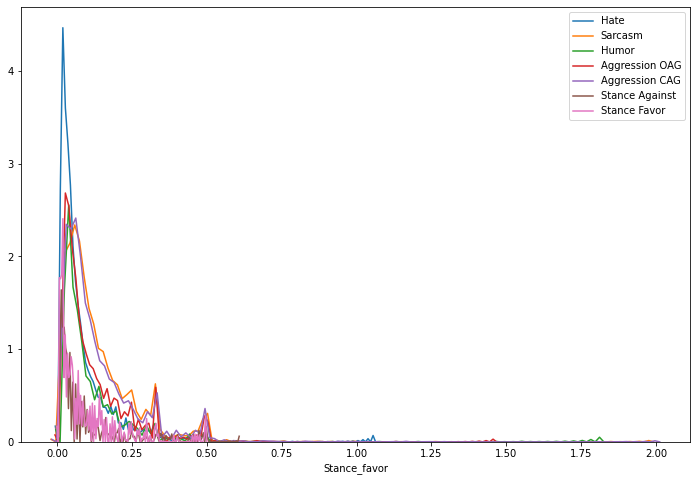

In [52]:
plt.figure(figsize=(12,8))
sns.distplot(words_hate.groupby(['word'])['Hate_yes'].var(), hist=False, rug=False, label='Hate')
sns.distplot(words_sarcasm.groupby(['word'])['Sarcasm_yes'].var(), hist=False, rug=False, label='Sarcasm')
sns.distplot(words_humor.groupby(['word'])['Humor_yes'].var(), hist=False, rug=False, label='Humor')
sns.distplot(words_aggression.groupby(['word'])['OAG'].var(), hist=False, rug=False, label='Aggression OAG')
sns.distplot(words_aggression.groupby(['word'])['CAG'].var(), hist=False, rug=False, label='Aggression CAG')
sns.distplot(words_stance.groupby(['word'])['Stance_against'].var(), hist=False, rug=False, label='Stance Against')
sns.distplot(words_stance.groupby(['word'])['Stance_favor'].var(), hist=False, rug=False, label='Stance Favor')

plt.show()

In [83]:
words = pd.merge(words_hate,words_aggression,how='outer')
words = pd.merge(words_humor,words,how='outer')
words = pd.merge(words_sarcasm,words,how='outer')
words = pd.merge(words_stance,words,how='outer')

In [84]:
words.word = words.word.fillna('')
words = words.fillna(0)

In [85]:
words.word = words.word.apply(lambda x: re.sub('[^a-zA-Z0-9]',' ',x).strip())

In [86]:
words = words[words.word != '']

In [87]:
words.sort_values(['Hate_yes'],ascending=[False]).head(10)

,word,Stance_against,Stance_favor,Sarcasm_yes,Humor_yes,Hate_yes,OAG,CAG
20512,digesting,0.0,0.0,1.071535e-03,0.000845,0.999951,-8.170481e-04,8.777101e-01
33987,kutta chara,0.0,0.0,-2.978322e-07,0.001198,0.999950,5.960464e-07,-4.723004e-07
19308,darshil,0.0,0.0,6.629938e-08,0.000008,0.999925,-2.921717e-03,2.950966e-03
25397,haan i,0.0,0.0,-1.063218e-07,-0.004526,0.999881,2.134442e-04,-3.944617e-05
23591,g d,0.0,0.0,-9.198704e-01,-0.000018,0.999874,9.999212e-01,-2.223383e-07
14863,bilkul bhi,0.0,0.0,-5.149382e-07,0.995849,0.999859,-1.818487e-07,9.981262e-01
38805,nahi hate,0.0,0.0,-4.155156e-09,0.050258,0.999855,-1.432282e-02,8.557901e-01
55222,yeah kulbhushan,0.0,0.0,-3.335941e-06,0.001512,0.999779,0.000000e+00,-1.002462e-16
32331,kedarnath,0.0,0.0,1.610946e-05,0.005625,0.999739,3.200485e-12,2.384186e-07
15730,buddhist hindu,0.0,0.0,6.454959e-07,-0.000006,0.999730,0.000000e+00,-5.082375e-10


In [88]:
words.sort_values(['OAG'],ascending=[False]).head(10)

,word,Stance_against,Stance_favor,Sarcasm_yes,Humor_yes,Hate_yes,OAG,CAG
37897,moorkhyamantri,0.0,0.0,9.794676e-06,8.747902e-01,0.958243,1.0,-1.074797e-07
19133,dalega,0.0,0.0,5.483627e-06,0.000000e+00,-0.023135,1.0,-1.000000e+00
17326,chodengi,0.0,0.0,2.384186e-07,1.045465e-03,-0.000136,1.0,-9.979492e-01
17708,chutiyam,0.0,0.0,9.999751e-01,2.405729e-05,0.002093,1.0,-1.375377e-09
49056,sonagacchi,0.0,0.0,7.656651e-01,2.261448e-02,-0.000574,1.0,-9.999965e-01
23819,ganduu,0.0,0.0,1.845956e-04,3.576279e-07,-0.013486,1.0,-1.000000e+00
44724,rashmidi,0.0,0.0,3.570718e-12,9.775162e-06,-0.000400,1.0,-1.000000e+00
23790,gandda,0.0,0.0,9.993249e-01,2.569578e-02,0.000097,1.0,-2.108788e-04
13604,begaane,0.0,0.0,5.254164e-01,2.069426e-02,0.000308,1.0,4.427404e-10
23847,ganndey,0.0,0.0,7.892537e-08,-4.768372e-07,0.044563,1.0,-9.999999e-01


In [89]:
words.sort_values(['CAG'],ascending=[False]).head(10)

,word,Stance_against,Stance_favor,Sarcasm_yes,Humor_yes,Hate_yes,OAG,CAG
54676,what d,0.0,0.0,-1.929354e-07,0.990632,-3.378133e-10,-7.529674e-08,1.0
26666,hatwao,0.0,0.0,-1.046565e-07,0.000233,6.957251e-06,-1.172675e-08,1.0
51078,tha bhul,0.0,0.0,1.755787e-06,0.878022,1.984589e-03,-3.026320e-12,1.0
50498,talaga,0.0,0.0,4.346886e-08,0.000001,-1.926064e-03,-1.000000e+00,1.0
10793,anas,0.0,0.0,-2.684685e-07,0.009254,6.160356e-05,1.962587e-08,1.0
30059,jangle,0.0,0.0,1.616877e-08,0.006700,1.080524e-05,1.016105e-11,1.0
40839,paidawaar,0.0,0.0,-2.804940e-06,-0.067348,-1.724105e-04,1.372573e-10,1.0
36428,maratha,0.0,0.0,2.726581e-14,0.010984,-1.896487e-01,1.620433e-08,1.0
32048,karwao agar,0.0,0.0,-1.303234e-03,0.766125,9.992986e-01,-9.434507e-11,1.0
26448,haray,0.0,0.0,9.997482e-01,0.034366,2.765008e-02,9.988347e-14,1.0


In [90]:
words.sort_values(['Humor_yes'],ascending=[False]).head(10)

,word,Stance_against,Stance_favor,Sarcasm_yes,Humor_yes,Hate_yes,OAG,CAG
14321,bhartvasi,0.0,0.0,9.514535e-01,0.999847,0.001053,1.569968e-07,0.000000e+00
39164,navaj,0.0,0.0,2.173781e-04,0.999843,-0.000997,1.068648e-04,9.946179e-01
31482,kaleja,0.0,0.0,1.178980e-04,0.999793,0.035410,9.999987e-01,-9.999202e-01
26698,haven t and,0.0,0.0,1.331825e-05,0.999670,0.000409,0.000000e+00,3.783693e-08
50231,swaminarayan,0.0,0.0,9.124244e-04,0.999627,0.000057,6.395489e-13,1.196785e-12
11251,apprehension,0.0,0.0,5.404397e-12,0.999609,0.000891,-2.796388e-10,-1.432531e-08
42585,pinnarayi,0.0,0.0,8.207964e-03,0.999594,-0.000017,-9.986787e-01,9.986783e-01
31616,kangesi,0.0,0.0,1.639593e-01,0.999567,0.006733,0.000000e+00,-8.368468e-09
46350,sahvaag,0.0,0.0,-6.812830e-08,0.999428,-0.000002,1.099253e-02,-3.006688e-03
44807,ravi s,0.0,0.0,1.259930e-04,0.999410,-0.000136,1.484208e-01,-6.395582e-03


In [91]:
words.sort_values(['Sarcasm_yes'],ascending=[False]).head(10)

,word,Stance_against,Stance_favor,Sarcasm_yes,Humor_yes,Hate_yes,OAG,CAG
51289,there beautiful,0.0,0.0,1.000000,6.477218e-01,9.484552e-04,1.940578e-07,6.862504e-05
26083,haiedia,0.0,0.0,0.999999,4.326063e-02,7.488851e-03,0.000000e+00,1.026680e-10
22470,faadu,0.0,0.0,0.999999,9.553286e-03,8.072946e-08,2.051902e-06,9.999980e-01
24401,ghostly,0.0,0.0,0.999998,2.041706e-02,6.592613e-04,9.252896e-01,-4.049243e-02
16571,chakao,0.0,0.0,0.999997,2.596425e-07,1.251424e-04,9.999983e-01,-9.999955e-01
30011,jammeh,0.0,0.0,0.999997,1.660692e-05,-7.228851e-04,-1.315228e-01,9.999963e-01
12540,bahgawn,0.0,0.0,0.999997,7.811920e-01,1.465335e-01,-6.465718e-04,5.661497e-01
42453,pichad,0.0,0.0,0.999996,8.650975e-03,1.817755e-04,-2.703399e-03,2.705157e-03
46740,samru apni,0.0,0.0,0.999996,-1.359302e-02,2.559889e-02,-6.439325e-01,-4.871716e-04
31004,judze,0.0,0.0,0.999996,1.485934e-02,-1.366309e-05,9.207640e-08,9.999713e-01


In [92]:
words.sort_values(['Stance_against'],ascending=[False]).head(10)

,word,Stance_against,Stance_favor,Sarcasm_yes,Humor_yes,Hate_yes,OAG,CAG
2544,fars,1.000000,-2.205069e-07,-3.132306e-02,1.312882e-02,0.231661,-5.053416e-01,0.507404
4619,khafa,0.999999,-9.999818e-01,-2.725664e-02,0.000000e+00,0.000555,-4.214942e-05,0.000040
3087,hai deshwasio,0.999987,9.538926e-07,1.432569e-02,-1.192093e-07,-0.003773,9.317618e-01,-0.931762
5391,mahangi,0.999951,-3.915120e-06,-8.418494e-02,-2.556841e-02,0.000034,-1.713246e-06,0.131883
3529,http fb me ybdiazbk,0.999901,-4.666000e-06,-2.170958e-01,9.536897e-01,-0.190544,-2.288827e-02,-0.813489
8075,sunoga,0.999896,6.513298e-10,2.639002e-09,4.642010e-04,0.000329,-1.183439e-09,-0.000555
8477,twitter com bgcixainsa,0.999842,-4.596322e-01,-9.999955e-01,-6.945908e-03,-0.000008,-4.041869e-05,0.000115
2083,deshdhroh,0.999819,-6.173543e-09,-1.672507e-06,1.180172e-05,-0.000194,-1.206559e-09,0.000000
851,banefit,0.999020,-2.576239e-06,3.891587e-04,3.981590e-05,0.017002,-4.573162e-01,0.457323
2753,gaya woh,0.998810,-2.921505e-03,-1.735161e-02,-5.137920e-05,-0.000136,2.920628e-05,-0.000029


In [93]:
words.sort_values(['Stance_favor'],ascending=[False]).head(10)

,word,Stance_against,Stance_favor,Sarcasm_yes,Humor_yes,Hate_yes,OAG,CAG
3392,ho modi,-0.000002,0.999994,1.217600e-01,-0.000265,-0.000035,1.424113e-05,0.270366
4650,kharchi,-0.446136,0.999993,2.389593e-04,-0.219877,-0.000063,-1.980007e-03,0.002053
5663,mehngayi,-0.982231,0.999867,8.860700e-08,-0.530392,-0.000832,6.145114e-01,0.040777
578,autowala,-0.000229,0.999742,1.394711e-05,-0.083417,-0.163407,-9.632322e-05,-0.001783
7012,raha modi,-0.000108,0.999440,5.399889e-02,-0.000060,0.086210,-1.369452e-03,0.001387
4433,karnewale,-0.000026,0.999060,4.548241e-01,-0.000150,0.181098,8.614528e-02,0.164284
1394,bonus,-0.000016,0.998495,2.406670e-02,0.089036,0.099759,6.846312e-04,-0.001231
5599,mauon,-0.017920,0.996649,8.646069e-04,0.247417,-0.000029,1.380329e-03,-0.001380
2173,dhoondte,-0.000189,0.995105,7.458206e-11,0.004159,0.006242,-3.803824e-08,-0.076984
7843,shubh,0.000086,0.994810,1.243338e-01,-0.023362,0.028979,-1.808291e-05,0.000015


In [94]:
cols = words.columns[1:]

words[cols].corr()

,Stance_against,Stance_favor,Sarcasm_yes,Humor_yes,Hate_yes,OAG,CAG
Stance_against,1.000000,-0.221145,-0.007104,0.007723,0.002116,-0.003799,-0.001111
Stance_favor,-0.221145,1.000000,0.012991,-0.009926,0.001841,0.005333,0.003310
Sarcasm_yes,-0.007104,0.012991,1.000000,0.038031,0.016610,0.039474,0.032593
Humor_yes,0.007723,-0.009926,0.038031,1.000000,0.005299,0.016807,0.021457
Hate_yes,0.002116,0.001841,0.016610,0.005299,1.000000,0.020924,-0.011450
OAG,-0.003799,0.005333,0.039474,0.016807,0.020924,1.000000,-0.609590
CAG,-0.001111,0.003310,0.032593,0.021457,-0.011450,-0.609590,1.000000


In [95]:
for col1 in cols:
    for col2 in cols:
        if col1 != col2:
            print (col1, col2, ttest_ind(words[col1],words[col2]).pvalue)

Stance_against Stance_favor 0.8859471347622856
Stance_against Sarcasm_yes 3.3716405312298655e-181
Stance_against Humor_yes 0.0
Stance_against Hate_yes 0.0
Stance_against OAG 0.0
Stance_against CAG 0.47138848517143506
Stance_favor Stance_against 0.8859471347622856
Stance_favor Sarcasm_yes 7.09021734416116e-180
Stance_favor Humor_yes 0.0
Stance_favor Hate_yes 0.0
Stance_favor OAG 0.0
Stance_favor CAG 0.44990856973981286
Sarcasm_yes Stance_against 3.3716405312298655e-181
Sarcasm_yes Stance_favor 7.09021734416116e-180
Sarcasm_yes Humor_yes 0.15862960654544553
Sarcasm_yes Hate_yes 1.0127144212750887e-48
Sarcasm_yes OAG 1.4175280531333537e-08
Sarcasm_yes CAG 1.1812828808226087e-104
Humor_yes Stance_against 0.0
Humor_yes Stance_favor 0.0
Humor_yes Sarcasm_yes 0.15862960654544553
Humor_yes Hate_yes 1.8329367237650333e-93
Humor_yes OAG 4.350473995606426e-18
Humor_yes CAG 7.734427597807684e-135
Hate_yes Stance_against 0.0
Hate_yes Stance_favor 0.0
Hate_yes Sarcasm_yes 1.0127144212750887e-48
Hate